* Based in the mapping dict we need to map the old zones to new zones in the Demand Matrix.

In [45]:
#import mapping zones json
folder = 'last'

import json

with open("zones_mapping.json","r") as file:
    mapping_zones_dict = json.load(file)
file.close()

In [46]:
# mapping zones of the demand matrix (.mtx, type-o) based in the json and scaling by 1/4 to get demand by hour.

ix = 0
count = 1
zx = float('inf')
FLAG = True
with open("Mat_Priv_TyE_2020.mtx", encoding='utf-8', errors='ignore', mode='r') as inF, \
     open("Mat_Priv_TyE_2020_out.mtx", encoding='utf-8', errors='ignore', mode='w') as outF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
                zx = ix
            if FLAG:
                line = line.strip().split(' ')
                z1,z2 = [l for l in line[:-1] if len(l)>0]
                outF.write(' ' * 10 + str(mapping_zones_dict[z1]) +
                        ' '*10 + str(mapping_zones_dict[z2]) + 
                        ' ' + str(float(line[-1])/4) + '\n'
                        )
        if ix < 8:
            outF.write(line)

        if ix>= zx:
            
            if (line[0] == '$' or line[0] == '*'):
                outF.write(line)
            else:
                z = line.strip().split(' ')[0]
                outF.write(str(mapping_zones_dict[z]) + ' ""' + '\n')
                count += 1
        ix += 1
inF.close()
outF.close()


*  Import mtx type-o skim matrices for tt0

In [47]:
#import tt0 matrix of the processed network
import pandas as pd
import matplotlib.pyplot as plt

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'tt0': []}
with open(folder + "/out.TT0.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(int(z1))
                data['toZone'].append(int(z2))
                data['tt0'].append(float(v))
        ix += 1
inF.close()
proc_df = pd.DataFrame(data)
proc_df.set_index(['fromZone', 'toZone'], inplace=True)
#proc_df

In [48]:
#import tt0 matrix of the original network

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'tt0': []}
with open(folder + "/base.TT0.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(int(z1))
                data['toZone'].append(int(z2))
                data['tt0'].append(float(v))
        ix += 1
inF.close()
orig_df = pd.DataFrame(data)
orig_df.set_index(['fromZone', 'toZone'], inplace=True)
#orig_df


original 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 762 
 340 
 107.490000 
 
 
 746 
 340 
 107.490000 
 
 
 329 
 104.840000 
 
 
 762 
 329 
 104.840000 
 
 
 353 
 104.610000 
 
 
 746 
 353 
 104.610000 
 
 
 763 
 762 
 104.330000 
 
 
 746 
 104.330000 
 
 
 548 
 746 
 104.330000 
 
 
 762 
 104.330000 
 
 
 550 
 746 
 104.330000 
 
 
 762 
 104.330000 
 
 
 746 
 330 
 103.750000 
 
 
 762 
 330 
 103.750000 
 
 
 333 
 102.940000 
 
 
 746 
 333 
 102.940000 
 
 
 334 
 102.440000 
 
 
 762 
 334 
 102.440000 
 
 
 36 
 746 
 102.250000 
 
 
 762 
 102.250000 
 
 
 

 
 processed 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 762 
 340 
 107.500000 
 
 
 746 
 340 
 107.500000 
 
 
 762 
 329 
 104.840000 
 
 
 746 
 329 
 104.840000 
 
 
 353 
 104.620000 
 
 
 762 
 353 
 104.620000 
 
 
 763 
 762 
 104.320000 
 
 
 550 
 762 
 104.320000 
 
 
 746 
 104.320000 
 
 
 548 
 746 
 104.320000 
 
 
 762 
 104.320000 
 
 
 763 
 746 
 104.320000 
 
 
 762 
 330 
 103.750000 
 
 
 746 
 330 
 103.750000 
 
 
 762 
 333 
 102.940000 
 
 
 746 
 333 
 102.940000 
 
 
 762 
 334 
 102.440000 
 
 
 746 
 334 
 102.440000 
 
 
 36 
 746 
 102.240000 
 
 
 762 
 102.240000

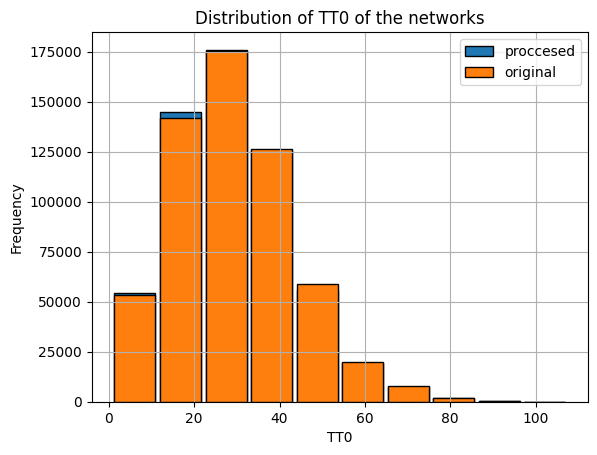

In [49]:
from IPython.display import display_html 


df1_styler = orig_df.sort_values('tt0',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('original')
df2_styler = proc_df.sort_values('tt0',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)
proc_df['tt0'].hist(label='proccesed', rwidth=.9, edgecolor = 'black')
orig_df['tt0'].hist(label='original', rwidth=.9, edgecolor = 'black')
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of TT0 of the networks')
plt.legend()

In [50]:
from IPython.display import display_html 


df1_styler = orig_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')
df2_styler = proc_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('original')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

processed 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.620000 
 
 
 3 
 5.450000 
 
 
 4 
 18.250000 
 
 
 5 
 7.030000 
 
 
 6 
 3.870000 
 
 
 7 
 2.410000 
 
 
 8 
 2.100000 
 
 
 9 
 2.940000 
 
 
 10 
 2.710000 
 
 
 11 
 3.210000 
 
 
 12 
 2.350000 
 
 
 13 
 4.800000 
 
 
 14 
 5.280000 
 
 
 15 
 5.920000 
 
 
 16 
 8.580000 
 
 
 17 
 23.350000 
 
 
 18 
 9.990000 
 
 
 19 
 11.170000 
 
 
 20 
 16.640000 
 
 
 21 
 16.220000 
 
 
 

 
 original 
 
 
   
   
 tt0 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.620000 
 
 
 3 
 5.450000 
 
 
 4 
 18.250000 
 
 
 5 
 7.030000 
 
 
 6 
 3.870000 
 
 
 7 
 2.410000 
 
 
 8 
 2.100000 
 
 
 9 
 2.940000 
 
 
 10 
 2.710000 
 
 
 11 
 3.210000 
 
 
 12 
 2.350000 
 
 
 13 
 4.800000 
 
 
 14 
 5.280000 
 
 
 15 
 5.920000 
 
 
 16 
 8.580000 
 
 
 17 
 23.350000 
 
 
 18 
 9.880000 
 
 
 19 
 11.170000 
 
 
 20 
 16.640000 
 
 
 21 
 16.220000

tt0
fromZone toZone      
1        2       0.00
         3       0.00
         4       0.00
         5       0.00
         6       0.00
...               ...
766      761     0.00
         762     0.01
         763     0.00
         764     0.00
         765     0.00

[585988 rows x 1 columns]

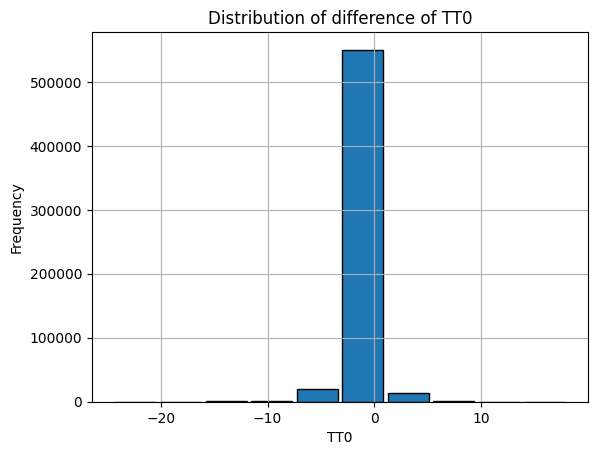

In [51]:
# distribution of difference 
#

from pandas import IndexSlice

diff = proc_df - orig_df
diff.hist(rwidth=.9, edgecolor = 'black')
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of difference of TT0')
(proc_df - orig_df).abs()


*  Import mtx type-o skim matrices for ttc

In [52]:
#import ttc matrix of the processed network
import pandas as pd
import matplotlib.pyplot as plt

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'ttc': []}
with open(folder + "/out.TTC.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(int(z1))
                data['toZone'].append(int(z2))
                data['ttc'].append(float(v))
        ix += 1
inF.close()
proc_df = pd.DataFrame(data)
proc_df.set_index(['fromZone', 'toZone'], inplace=True)
#proc_df

In [53]:
#import ttc matrix of the original network

ix = 0
FLAG = True
data = {'fromZone':[], 'toZone': [], 'ttc': []}
with open(folder + "/base.TTC.mtx", encoding='utf-8', errors='ignore', mode='r') as inF:
    for line in inF:
        if ix >= 8:
            if line[0] == '*':
                FLAG = False
            if FLAG:
                line = line.strip().split(' ')
                z1,z2,v = [l for l in line if len(l)>0]
                data['fromZone'].append(int(z1))
                data['toZone'].append(int(z2))
                data['ttc'].append(float(v))
        ix += 1
inF.close()
orig_df = pd.DataFrame(data)
orig_df.set_index(['fromZone', 'toZone'], inplace=True)



original 
 
 
   
   
 ttc 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 340 
 762 
 113.030000 
 
 
 746 
 113.030000 
 
 
 746 
 340 
 110.770000 
 
 
 762 
 340 
 110.770000 
 
 
 329 
 746 
 110.000000 
 
 
 762 
 110.000000 
 
 
 353 
 762 
 109.770000 
 
 
 746 
 109.770000 
 
 
 330 
 762 
 109.320000 
 
 
 746 
 109.320000 
 
 
 36 
 746 
 108.500000 
 
 
 762 
 108.500000 
 
 
 333 
 762 
 108.240000 
 
 
 746 
 108.240000 
 
 
 550 
 762 
 108.230000 
 
 
 548 
 746 
 108.230000 
 
 
 550 
 746 
 108.230000 
 
 
 763 
 762 
 108.230000 
 
 
 746 
 108.230000 
 
 
 548 
 762 
 108.230000 
 
 
 

 
 processed 
 
 
   
   
 ttc 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 340 
 762 
 112.870000 
 
 
 746 
 112.870000 
 
 
 762 
 340 
 110.770000 
 
 
 746 
 340 
 110.770000 
 
 
 329 
 746 
 109.840000 
 
 
 762 
 109.840000 
 
 
 353 
 746 
 109.610000 
 
 
 762 
 109.610000 
 
 
 330 
 762 
 109.150000 
 
 
 746 
 109.150000 
 
 
 36 
 762 
 108.530000 
 
 
 746 
 108.530000 
 
 
 548 
 746 
 108.350000 
 
 
 762 
 108.350000 
 
 
 550 
 746 
 108.350000 
 
 
 763 
 746 
 108.350000 
 
 
 550 
 762 
 108.350000 
 
 
 763 
 762 
 108.350000 
 
 
 333 
 762 
 108.070000 
 
 
 746 
 108.070000

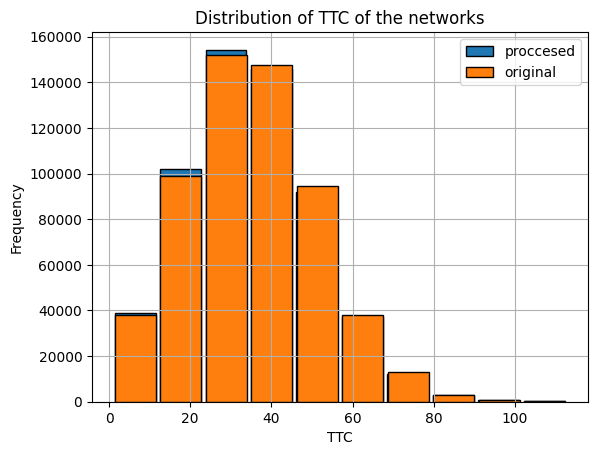

In [57]:
from IPython.display import display_html 


df1_styler = orig_df.sort_values('ttc',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('original')
df2_styler = proc_df.sort_values('ttc',ascending=False).head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)


proc_df['ttc'].hist(label='proccesed',rwidth=.9, edgecolor = 'black')
orig_df['ttc'].hist(label='original',rwidth=.9, edgecolor = 'black')
plt.xlabel('TTC')
plt.ylabel('Frequency')
plt.title('Distribution of TTC of the networks')
plt.legend()

In [58]:
from IPython.display import display_html 


df1_styler = orig_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('processed')
df2_styler = proc_df.head(20).style.set_table_attributes("style='display:inline'").set_caption('original')


display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

processed 
 
 
   
   
 ttc 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.800000 
 
 
 3 
 5.640000 
 
 
 4 
 18.440000 
 
 
 5 
 9.670000 
 
 
 6 
 4.020000 
 
 
 7 
 2.640000 
 
 
 8 
 2.790000 
 
 
 9 
 3.380000 
 
 
 10 
 3.840000 
 
 
 11 
 4.300000 
 
 
 12 
 3.050000 
 
 
 13 
 5.700000 
 
 
 14 
 6.280000 
 
 
 15 
 8.020000 
 
 
 16 
 10.050000 
 
 
 17 
 25.570000 
 
 
 18 
 11.630000 
 
 
 19 
 13.150000 
 
 
 20 
 21.460000 
 
 
 21 
 20.200000 
 
 
 

 
 original 
 
 
   
   
 ttc 
 
 
 fromZone 
 toZone 
   
 
 
 
 
 1 
 2 
 4.800000 
 
 
 3 
 5.640000 
 
 
 4 
 18.440000 
 
 
 5 
 9.730000 
 
 
 6 
 4.020000 
 
 
 7 
 2.650000 
 
 
 8 
 2.800000 
 
 
 9 
 3.380000 
 
 
 10 
 3.860000 
 
 
 11 
 4.320000 
 
 
 12 
 3.060000 
 
 
 13 
 5.710000 
 
 
 14 
 6.290000 
 
 
 15 
 8.060000 
 
 
 16 
 10.070000 
 
 
 17 
 25.580000 
 
 
 18 
 11.650000 
 
 
 19 
 13.170000 
 
 
 20 
 21.460000 
 
 
 21 
 20.250000

ttc
fromZone toZone      
1        2       0.00
         3       0.00
         4       0.00
         5       0.06
         6       0.00
...               ...
766      761     0.00
         762     0.00
         763     0.06
         764     0.15
         765     0.15

[585988 rows x 1 columns]

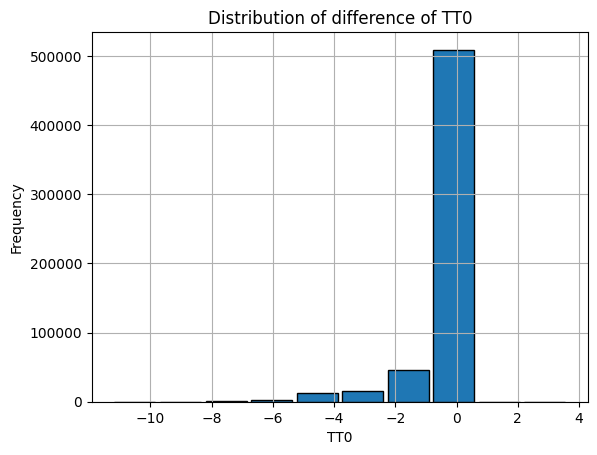

In [59]:
# distribution of difference 
#

from pandas import IndexSlice

diff = proc_df - orig_df
diff.hist(rwidth=.9, edgecolor = 'black')
plt.xlabel('TT0')
plt.ylabel('Frequency')
plt.title('Distribution of difference of TT0')
(proc_df - orig_df).abs()
